In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [41]:
# Load dataset
df = pd.read_csv('Advertising.csv')

In [42]:
df.shape

(200, 5)

In [43]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [44]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
df = df.drop('Unnamed: 0', axis=1)

In [46]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [47]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [49]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

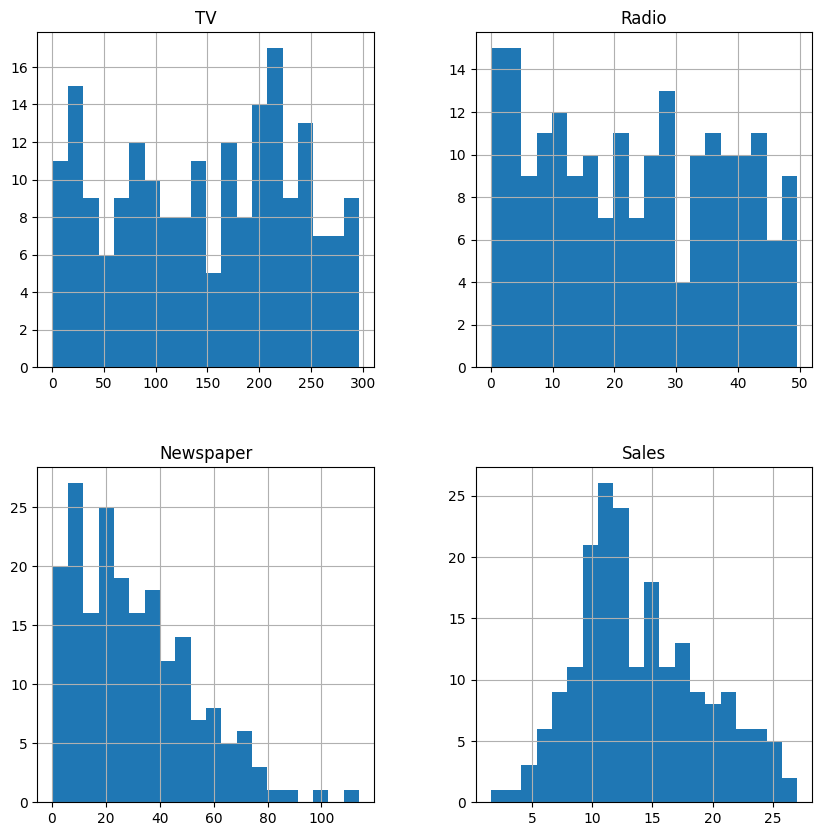

In [50]:
df.hist(bins=20, figsize=(10,10))
plt.show()

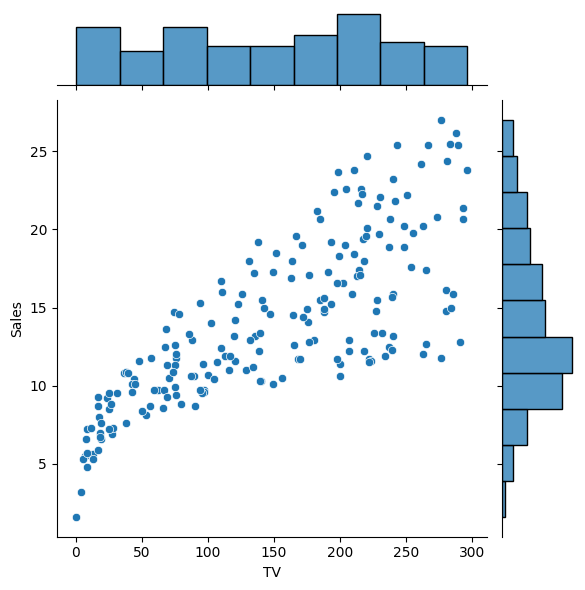

In [51]:
sns.jointplot(x='TV', y='Sales', data=df)
plt.show()

In [52]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


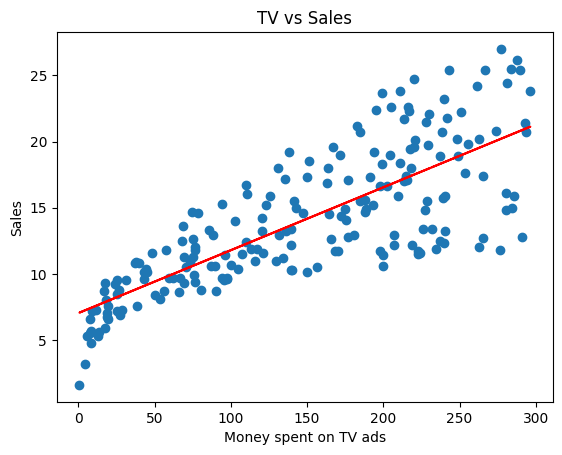

In [53]:
#  linear model 
lr = LinearRegression()

#  TV vs Sales

lr.fit(df[['TV']], df['Sales']) 
plt.scatter(df['TV'], df['Sales'])
plt.plot(df['TV'], lr.predict(df[['TV']]), color='red')
plt.title('TV vs Sales')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Sales')
plt.show()

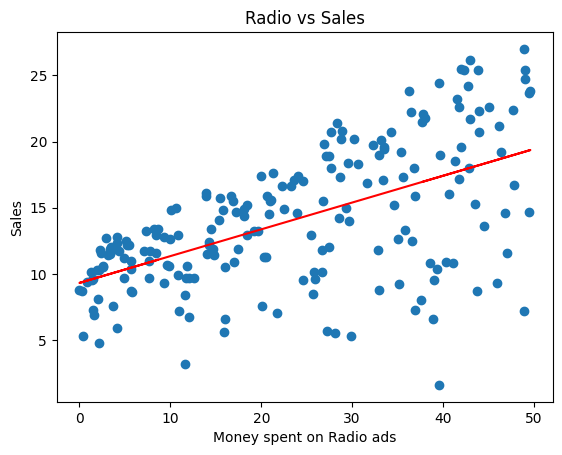

In [54]:
# Radio vs Sales
lr.fit(df[['Radio']], df['Sales'])
plt.scatter(df['Radio'], df['Sales'])
plt.plot(df['Radio'], lr.predict(df[['Radio']]), color='red') 
plt.title('Radio vs Sales')
plt.xlabel('Money spent on Radio ads')  
plt.ylabel('Sales')
plt.show()

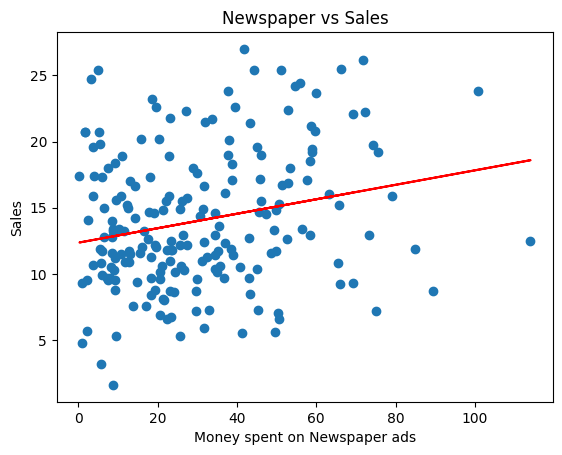

In [55]:
# Newspaper vs Sales
lr.fit(df[['Newspaper']], df['Sales'])
plt.scatter(df['Newspaper'], df['Sales'])
plt.plot(df['Newspaper'], lr.predict(df[['Newspaper']]), color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Money spent on Newspaper ads')  
plt.ylabel('Sales')
plt.show()

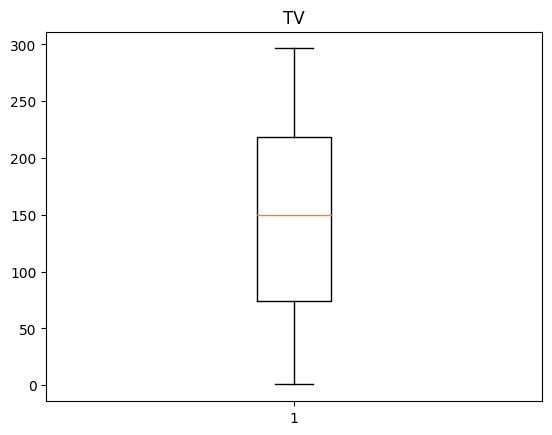

In [56]:
# Boxplot for TV 
plt.boxplot(df['TV'])
plt.title('TV')
plt.show()

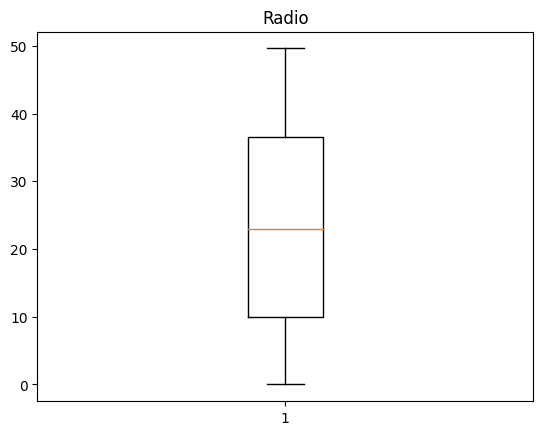

In [57]:
# Boxplot for Radio
plt.boxplot(df['Radio'])
plt.title('Radio')
plt.show()


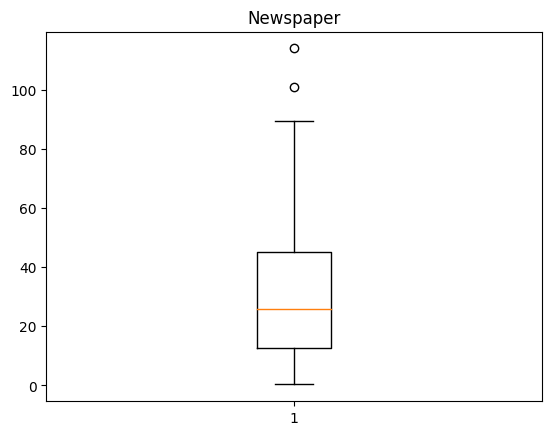

In [58]:
# Boxplot for Newspaper
plt.boxplot(df['Newspaper'])
plt.title('Newspaper')
plt.show()

In [59]:
# Remove outlier rows
df = df[df['Newspaper'] < 85]

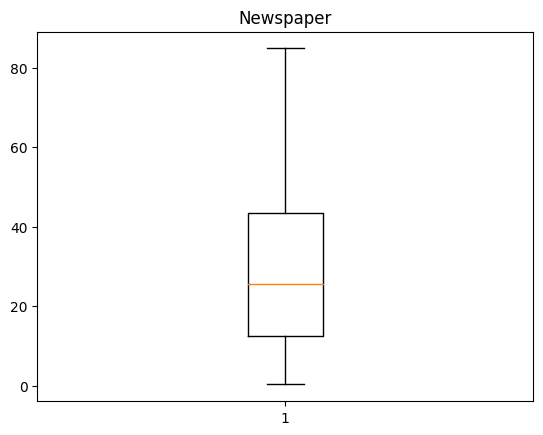

In [60]:
# Boxplot for Newspaper
plt.boxplot(df['Newspaper'])
plt.title('Newspaper')
plt.show()

In [61]:
# Split data 
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Evaluate model
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8758995740689581
